# Trash detection using Mask R-CNN 



new


In [5]:
import os
import sys
import random
import math
import re
import time
import glob
import skimage
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project. 
# Change in case you want to put the notebook somewhere else.
ROOT_DIR = os.getcwd()
print(ROOT_DIR)

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from trash import trash

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Trash trained weights
TRASH_WEIGHTS_PATH = "weights/mask_rcnn_trash_0200_030519_large.h5" #the best

print('Weights being used: ', TRASH_WEIGHTS_PATH)

C:\Users\asmat\Desktop\wade-ai-master\Trash_Detection
Weights being used:  weights/mask_rcnn_trash_0200_030519_large.h5


## Configurations

In [ ]:
config = trash.TrashConfig()
TRASH_DIR = 'trash'
TRASH_DIR

In [28]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.95
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE       

## Notebook Preferences

In [ ]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [ ]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [ ]:
# Load validation dataset
dataset = trash.TrashDataset()
dataset.load_trash(TRASH_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

## Load Model

In [ ]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,config=config)

In [ ]:
# Load the weights you trained
weights_path = os.path.join(ROOT_DIR, TRASH_WEIGHTS_PATH)
model.load_weights(weights_path, by_name=True)
print("Loading weights ", TRASH_WEIGHTS_PATH)

## Select test images

In [ ]:
# Get images from the directory of all the test images


jpg = glob.glob("trash_img/location1/*.jpg")
jpeg = glob.glob("trash_img/location1/*.jpeg")
jpg.extend(jpeg)
jpg

5

ERROR! Session/line number was not unique in database. History logging moved to new session 18


## Run detection on images

trash_img/location1\photo_2021-04-14_15-42-58.jpg
Processing 1 images
image                    shape: (1280, 720, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Area of the garbage pile = 59.505399999999995
trash_img/location1\photo_2021-04-14_15-43-12.jpg
Processing 1 images
image                    shape: (1280, 720, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Area of the garbage pile = 52.2543
trash_img/locat

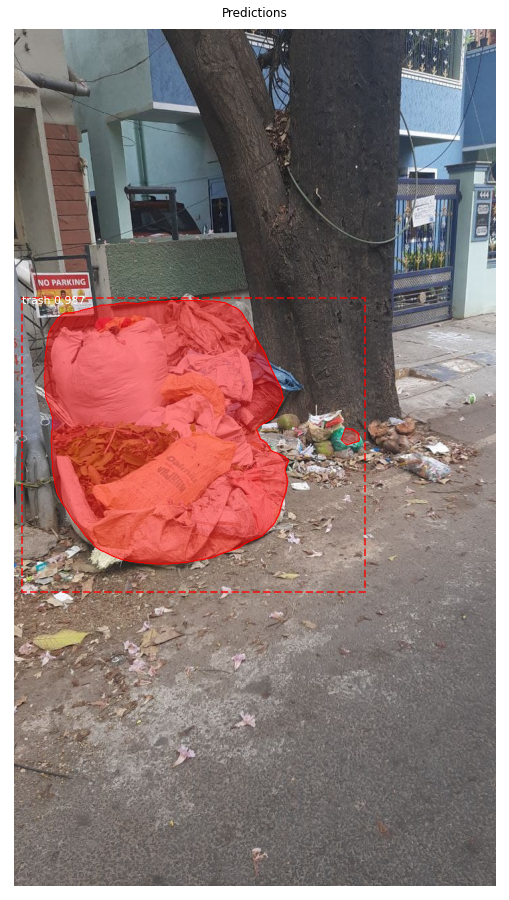

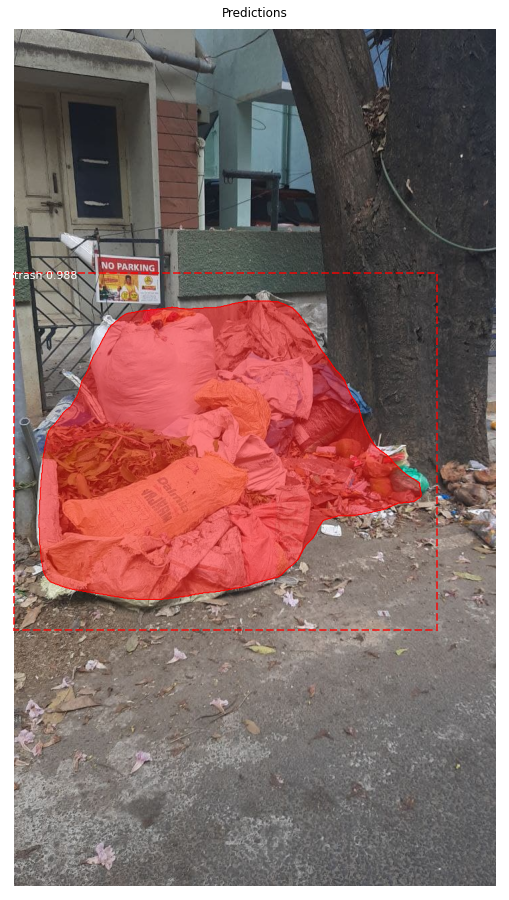

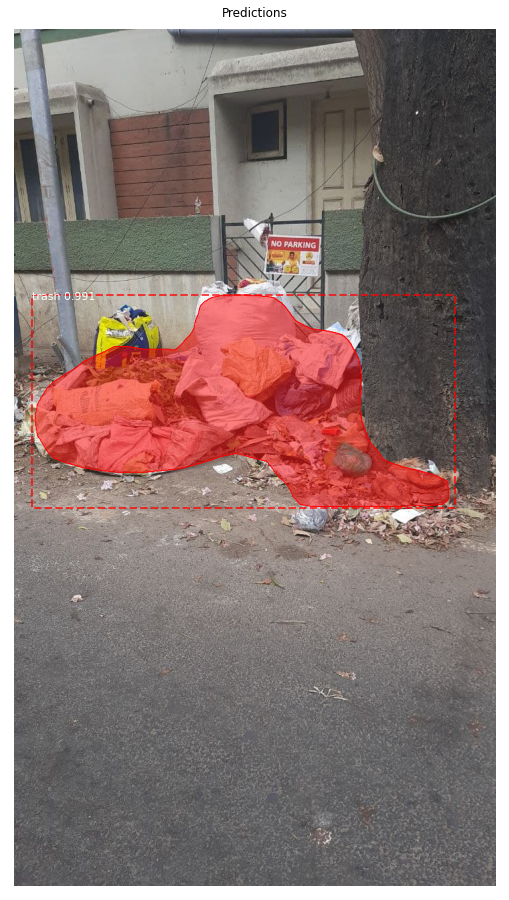

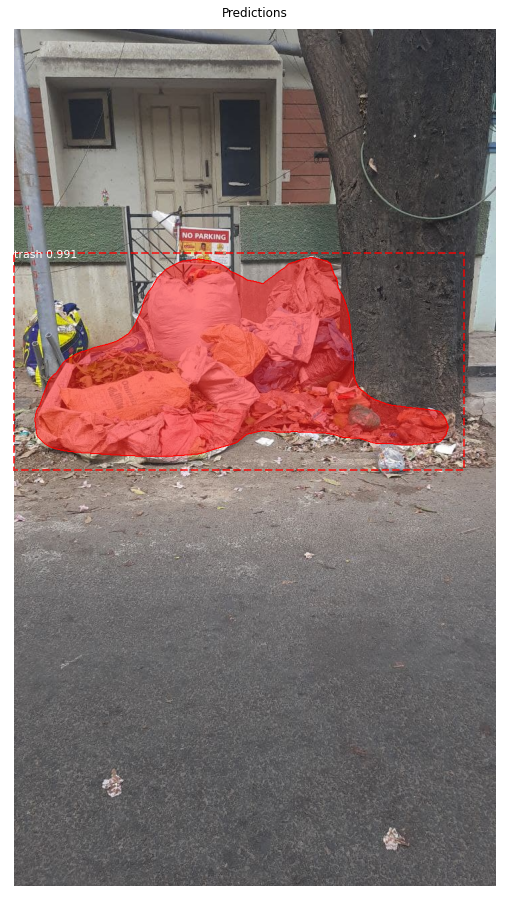

In [35]:
import cv2
total = 0
height = 10 #metres

for image in jpg:
    print(image)
    
    image = skimage.io.imread('{}'.format(image))

    # Run object detection
    results = model.detect([image], verbose=1)
    
    
    #area
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
    pixels = cv2.countNonZero(thresh)
    pixels = (image.shape[0] * image.shape[1]) - pixels
    area = (pixels/1000)/height
    print("Area of the garbage pile = {0}".format(area))
    total += area
    #cv2.putText(image, '{}'.format(pixels), (xx,yy - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)
    

    # Display results
    ax = get_ax(1)
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                dataset.class_names, r['scores'], ax=ax,
                                title="Predictions")
    
avg = int(total/len(jpg))
print("Average Area of the garbage pile = {0}".format(avg)) 
